In [8]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder().fit_transform(df.gender)
df.gender=lbe

In [11]:
lbe=LabelEncoder().fit_transform(df.Residence_type)
df.Residence_type=lbe

In [14]:
df=pd.get_dummies(df,columns=["ever_married","work_type","smoking_status"],prefix=["ever_married","work_type","smoking_status"])

In [16]:
from ycimpute.imputer import knnimput
feat_names=list(df)
ndf=np.array(df)
s1=knnimput.KNN(k = 5).complete(ndf)
s1=s1.round()
df=pd.DataFrame(s1,columns=feat_names)
df.isnull().sum()

Imputing row 1/5110 with 0 missing, elapsed time: 4.095
Imputing row 101/5110 with 0 missing, elapsed time: 4.173
Imputing row 201/5110 with 1 missing, elapsed time: 4.174
Imputing row 301/5110 with 0 missing, elapsed time: 4.175
Imputing row 401/5110 with 0 missing, elapsed time: 4.176
Imputing row 501/5110 with 0 missing, elapsed time: 4.176
Imputing row 601/5110 with 0 missing, elapsed time: 4.176
Imputing row 701/5110 with 0 missing, elapsed time: 4.177
Imputing row 801/5110 with 0 missing, elapsed time: 4.177
Imputing row 901/5110 with 0 missing, elapsed time: 4.178
Imputing row 1001/5110 with 0 missing, elapsed time: 4.179
Imputing row 1101/5110 with 0 missing, elapsed time: 4.179
Imputing row 1201/5110 with 0 missing, elapsed time: 4.180
Imputing row 1301/5110 with 1 missing, elapsed time: 4.180
Imputing row 1401/5110 with 0 missing, elapsed time: 4.181
Imputing row 1501/5110 with 0 missing, elapsed time: 4.182
Imputing row 1601/5110 with 0 missing, elapsed time: 4.182
Imputing 

gender                            0
age                               0
hypertension                      0
heart_disease                     0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [17]:
df

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0.0,1.0,1.0,229.0,37.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,61.0,0.0,0.0,0.0,202.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,80.0,0.0,1.0,0.0,106.0,32.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,171.0,34.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,79.0,1.0,0.0,0.0,174.0,24.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,84.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,0.0,81.0,0.0,0.0,1.0,125.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,0.0,35.0,0.0,0.0,0.0,83.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,1.0,51.0,0.0,0.0,0.0,166.0,26.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
iqr=q3-q1
down_limit=(q1-iqr*1.5)
up_limit=(q3+iqr*1.5)
down_limit,up_limit

(10.5, 46.5)

C:\Users\berka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

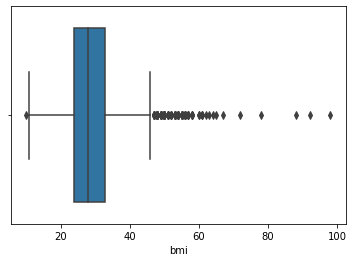

In [19]:
sns.boxplot(df.bmi)

In [22]:
vector= ((df.bmi < up_limit) & (df.bmi > down_limit))

In [25]:
df=df[vector]

In [28]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
lof.fit_predict(df)
scores=lof.negative_outlier_factor_

In [29]:
scores.min(),scores.max(),scores.mean()

(-2.062687916444797, -0.9494419720682854, -1.037225037698081)

In [30]:
vector= scores > -1.2

In [32]:
df=df[vector]

In [34]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier,
       CatBoostClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        if model==CatBoostClassifier:
            modelf=model().fit(x_train,y_train,verbose=False)
        else:
            modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(model(),x_train,y_train ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(model(),x_train,y_train ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train,x_test,y_train,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.953198051948052
            f1_score:0.0
            fit&predict time:0.06282949447631836
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.9459185606060606
            f1_score:0.03603896103896104
            fit&predict time:0.14464044570922852
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.953198051948052
            f1_score:0.0
            fit&predict time:0.1688239574432373
            
------------------------------------------------------------

            Model:MLPClassifier
            accuracy_score:0.9498153409090909
            f1_score:0.018859649122807014
            fit&predict time:0.9737234115600586
            
------------------------------------------------------------

            Model:DecisionTreeClassifier
            accurac

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

            Model:XGBClassifier
            accuracy_score:0.941497564935065
            f1_score:0.059384444862705735
            fit&predict time:1.4884710311889648
            
------------------------------------------------------------

            Model:CatBoostClassifier
            accuracy_score:0.9495549242424243
            f1_score:0.019523809523809523
            fit&predict time:3.3971383571624756
            
------------------------------------------------------------


In [37]:
df.to_csv("rdf.csv")

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [40]:
counter=Counter(y)
print(counter)

Counter({0.0: 4571, 1.0: 237})


In [41]:
x,y=SMOTE().fit_resample(x_train,y_train)

In [42]:
counter=Counter(y)
print(counter)

Counter({1.0: 4571, 0.0: 4571})


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        if model==CatBoostClassifier:
            modelf=model().fit(x_train,y_train,verbose=False)
        else:
            modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(model(),x_train,y_train ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(model(),x_train,y_train ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train,x_test,y_train,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.7850416376996853
            f1_score:0.7933386137014801
            fit&predict time:0.0688314437866211
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.8870502642536238
            f1_score:0.8963285966258333
            fit&predict time:0.334972620010376
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.7660342520538524
            f1_score:0.7761437501239556
            fit&predict time:2.263439416885376
            
------------------------------------------------------------


C:\Users\berka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



            Model:MLPClassifier
            accuracy_score:0.821149447197865
            f1_score:0.8225416428432899
            fit&predict time:4.71144962310791
            
------------------------------------------------------------

            Model:DecisionTreeClassifier
            accuracy_score:0.9433902955005868
            f1_score:0.9413103543634984
            fit&predict time:0.02592945098876953
            
------------------------------------------------------------

            Model:RandomForestClassifier
            accuracy_score:0.9699167619773796
            f1_score:0.9689238161012579
            fit&predict time:0.5485682487487793
            
------------------------------------------------------------

            Model:GradientBoostingClassifier
            accuracy_score:0.9640372122924654
            f1_score:0.9628793632544669
            fit&predict time:1.4331998825073242
            
------------------------------------------------------------

      

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



            Model:XGBClassifier
            accuracy_score:0.9659518363197357
            f1_score:0.9652094657170831
            fit&predict time:0.38496899604797363
            
------------------------------------------------------------


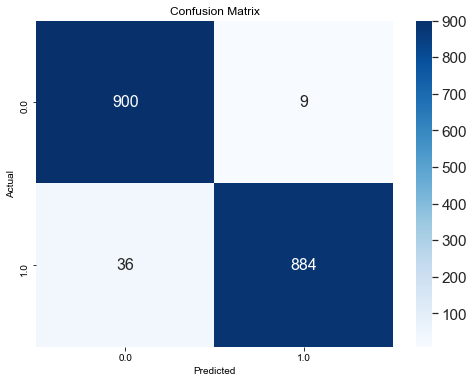

SCORES
accuracy_score:0.9753963914707491
f1_score:0.9751792608935466

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       909
         1.0       0.99      0.96      0.98       920

    accuracy                           0.98      1829
   macro avg       0.98      0.98      0.98      1829
weighted avg       0.98      0.98      0.98      1829



In [45]:
lgbm_model=LGBMClassifier().fit(x_train,y_train)

y_pred=lgbm_model.predict(x_test)

import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [47]:
## Since the SMOTE algorithm determines lots of "1" labels, we can not say that it is true. So i should oversample only the train_set.

In [59]:
df=pd.read_csv("rdf.csv")

In [60]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [61]:
df

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0.0,1.0,1.0,229.0,37.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,61.0,0.0,0.0,0.0,202.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,80.0,0.0,1.0,0.0,106.0,32.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,171.0,34.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,79.0,1.0,0.0,0.0,174.0,24.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0.0,13.0,0.0,0.0,0.0,103.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4804,0.0,80.0,1.0,0.0,1.0,84.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4805,0.0,35.0,0.0,0.0,0.0,83.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4806,1.0,51.0,0.0,0.0,0.0,166.0,26.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [64]:
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

In [67]:
models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        if model==CatBoostClassifier:
            modelf=model().fit(x_train,y_train,verbose=False)
        else:
            modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(model(),x_train,y_train ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(model(),x_train,y_train ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train,x_test,y_train,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.7790247924591946
            f1_score:0.7899842446559623
            fit&predict time:0.0768129825592041
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.8958113299477164
            f1_score:0.9040731875206152
            fit&predict time:0.21637630462646484
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.7562981841350748
            f1_score:0.7686151764085509
            fit&predict time:2.0345654487609863
            
------------------------------------------------------------


C:\Users\berka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



            Model:MLPClassifier
            accuracy_score:0.8314637482900137
            f1_score:0.8412458272675009
            fit&predict time:4.683512210845947
            
------------------------------------------------------------

            Model:DecisionTreeClassifier
            accuracy_score:0.9457991492232445
            f1_score:0.9414086845819097
            fit&predict time:0.035932064056396484
            
------------------------------------------------------------

            Model:RandomForestClassifier
            accuracy_score:0.9716796282068099
            f1_score:0.9635940530811894
            fit&predict time:0.6392815113067627
            
------------------------------------------------------------

            Model:GradientBoostingClassifier
            accuracy_score:0.9673001892697186
            f1_score:0.9575133408073677
            fit&predict time:1.0382332801818848
            
------------------------------------------------------------

   

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



            Model:XGBClassifier
            accuracy_score:0.9648355602196277
            f1_score:0.9558445243171038
            fit&predict time:0.5181424617767334
            
------------------------------------------------------------


In [68]:
counter=Counter(y_test)
print(counter)
counter=Counter(y_train)
print(counter)

Counter({0.0: 919, 1.0: 43})
Counter({0.0: 3652, 1.0: 3652})


In [69]:
# It is ok now, test set is not oversampled whereas train is so.

In [76]:
lgbm_model=LGBMClassifier().fit(x_train,y_train)

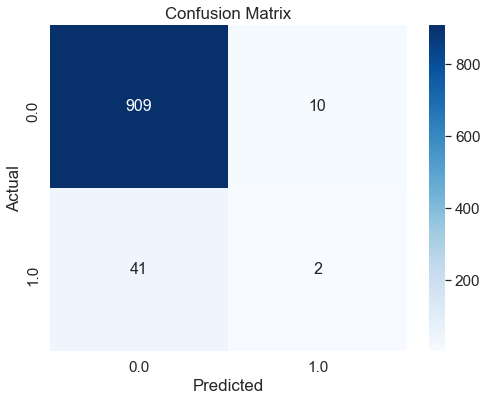

SCORES
accuracy_score:0.946985446985447
f1_score:0.07272727272727272

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       919
         1.0       0.17      0.05      0.07        43

    accuracy                           0.95       962
   macro avg       0.56      0.52      0.52       962
weighted avg       0.92      0.95      0.93       962



In [77]:
y_pred=lgbm_model.predict(x_test)

import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))